In [59]:
%run symplectic_euler.ipynb
%run hamiltonian.ipynb
%run Lotka-Volterra_odeint.ipynb

In [ ]:
# --------------------------------------------------Harmonic Oscillator Example----------------------------------------------------

def T(p):
    return (p**2)/2

def V(q):
    return (q**2)/2

ho_model = Hamiltonian(solver=symplectic_euler(T, V, initial_point=[0.,1.], t_interval=[0,2*np.pi], h=0.5), input_dim=1, output_dim=2,
            hidden_layer=20, each_neuron=64, activation_func=tf.math.sin, epoch=2000 ,batch_size=100000000, learning_rate=0.0002, h_for_t_created=0.001)


plt.figure(figsize = (4, 4))
plt.xlabel('q', fontsize=17,fontweight="bold",fontname="Times New Roman")
plt.ylabel('p', fontsize=17,fontweight="bold",fontname="Times New Roman")
plt.title("Phase Diagram", fontsize=17,fontweight="bold",fontname="Times New Roman")

test_t = np.arange(0,2*np.pi,0.01)
prediction_energy = ho_model.energy_model_train(test_t)
prediction_mse = ho_model.model_train(test_t)

# grand-truth
plt.scatter(tf.math.sin(np.arange(0.,2*np.pi,0.3)), tf.math.cos(np.arange(0.,2*np.pi,0.3)), c="green")
# symplectic euler
plt.plot(ho_model.z[:,0], ho_model.z[:,1])
# NN with mse
plt.plot(prediction_mse[:,0], prediction_mse[:,1])
# NN with energy loss
plt.plot(prediction_energy[:,0], prediction_energy[:,1], c="red")

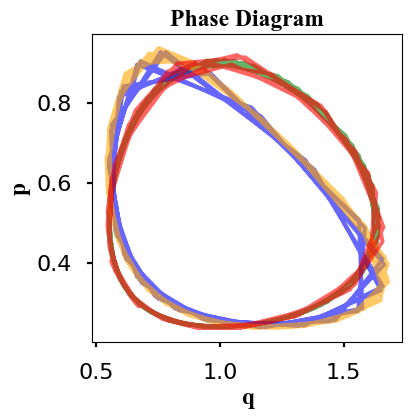

In [64]:
# --------------------------------------------------Lotka-Volterra Example----------------------------------------------------

# α = 2/3, β = 4/3, γ = 1 = δ. Assume x, y quantify thousands each. Circles represent prey and predator initial conditions from x = y = 0.9 to 1.8, in steps of 0.1. The fixed point is at (1, 1/2).
# q = ln(y), p = ln(x) 
"""
def T(p):
  return tf.math.exp(p) - p

def V(q):
  return (4/3) * tf.math.exp(q) - (2/3) * q

lv_model = Hamiltonian(solver=symplectic_euler(T, V, initial_point=[-0.105, -0.105], t_interval=[0, 50], h=1), input_dim=1, output_dim=2,
            hidden_layer=20, each_neuron=64, activation_func=tf.math.sin, epoch=1000 ,batch_size=100000000, learning_rate=0.0002, h_for_t_created=0.5)

"""
plt.figure(figsize = (4, 4))
plt.xlabel('q', fontsize=17,fontweight="bold",fontname="Times New Roman")
plt.ylabel('p', fontsize=17,fontweight="bold",fontname="Times New Roman")
plt.title("Phase Diagram", fontsize=17,fontweight="bold",fontname="Times New Roman")

test_t = np.arange(0,50,0.5)
prediction_energy = lv_model.energy_model_train(test_t)
prediction_mse = lv_model.model_train(test_t)

# grand-truth
x, y = lotka_volterra(alpha=2/3, beta=4/3, delta=1., gamma=1., x0=0.9, y0=0.9, t_interval=[0,50], h=0.5)
plt.plot(x, y, c ="green", alpha=0.6)
# symplectic euler
plt.plot(np.exp(lv_model.z[:,1]), np.exp(lv_model.z[:,0]), c ="blue", alpha=0.6)
# NN with mse
plt.plot(np.exp(prediction_mse[:,1]), np.exp(prediction_mse[:,0]), c ="orange", alpha=0.6)
# NN with energy loss
plt.plot(np.exp(prediction_energy[:,1]), np.exp(prediction_energy[:,0]), c="red", alpha=0.6)